In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#looking for job_country for Ireland
df_IR = df[df['job_country'] == 'Ireland']

In [3]:
#exploding our data into a new frame
df_skills = df_IR.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
33,Data Engineer,sql
33,Data Engineer,python
33,Data Engineer,r
33,Data Engineer,azure
33,Data Engineer,databricks
...,...,...
785497,Data Engineer,sql
785497,Data Engineer,aws
785497,Data Engineer,linux
785497,Data Engineer,git


In [4]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1019,sql,Data Analyst,1227
1020,sql,Data Engineer,1024
792,python,Data Engineer,956
285,excel,Data Analyst,919
793,python,Data Scientist,759
...,...,...,...
494,jupyter,Machine Learning Engineer,1
38,asp.net,Data Analyst,1
498,kafka,Business Analyst,1
483,jquery,Cloud Engineer,1


In [5]:
#create a list for top roles and filter the job title on most popular
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

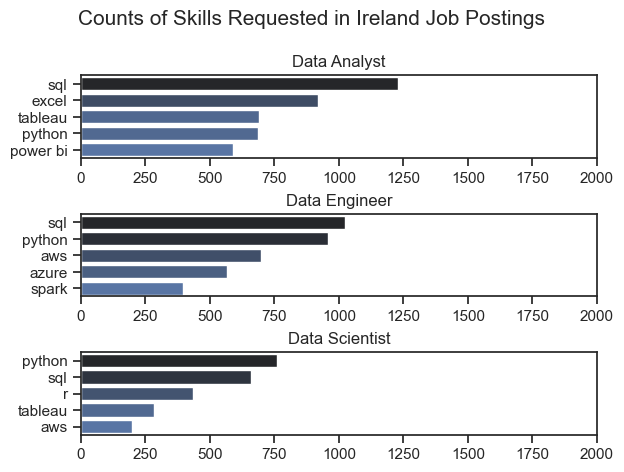

In [10]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 2000) # make the scales the same

fig.suptitle('Counts of Skills Requested in Ireland Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [11]:
# Use original df to get the count of job titles
df_job_title_count = df_IR['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,2756
1,Data Engineer,1925
2,Data Scientist,1435
3,Software Engineer,1365
4,Business Analyst,1064
5,Senior Data Engineer,811
6,Senior Data Analyst,641
7,Senior Data Scientist,549
8,Cloud Engineer,360
9,Machine Learning Engineer,256


In [12]:
#merging our dataframes to get the percentage of skills per job title
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Analyst,1227,2756,44.521045
1,sql,Data Engineer,1024,1925,53.194805
2,python,Data Engineer,956,1925,49.662338
3,excel,Data Analyst,919,2756,33.345428
4,python,Data Scientist,759,1435,52.891986
...,...,...,...,...,...
1218,jupyter,Machine Learning Engineer,1,256,0.390625
1219,asp.net,Data Analyst,1,2756,0.036284
1220,kafka,Business Analyst,1,1064,0.093985
1221,jquery,Cloud Engineer,1,360,0.277778


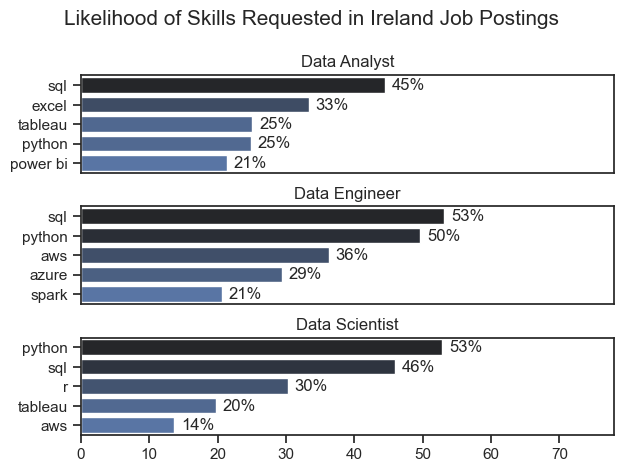

In [13]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in Ireland Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()